<a href="https://colab.research.google.com/github/v-misha17/Ml-projects/blob/main/CNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0
print(X_train.shape)
print(X_test.shape)
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.7621 - loss: 0.6691 - val_accuracy: 0.8770 - val_loss: 0.3381
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.8799 - loss: 0.3292 - val_accuracy: 0.8787 - val_loss: 0.3250
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8974 - loss: 0.2831 - val_accuracy: 0.8878 - val_loss: 0.3042
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9126 - loss: 0.2376 - val_accuracy: 0.9072 - val_loss: 0.2582
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9209 - loss: 0.2155 - val_accuracy: 0.9032 - val_loss: 0.2671
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9263 - loss: 0.1959 - val_accuracy: 0.9122 - val_loss: 0.2358
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9339 - loss: 0.1791 - val_accuracy: 0.9115 - val_loss: 0.2477
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9378 -

In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print(f"\nTest Loss:{test_loss}")
print(f"Test Accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9038 - loss: 0.2945

Test Loss:0.2862965762615204
Test Accuracy:0.9053999781608582


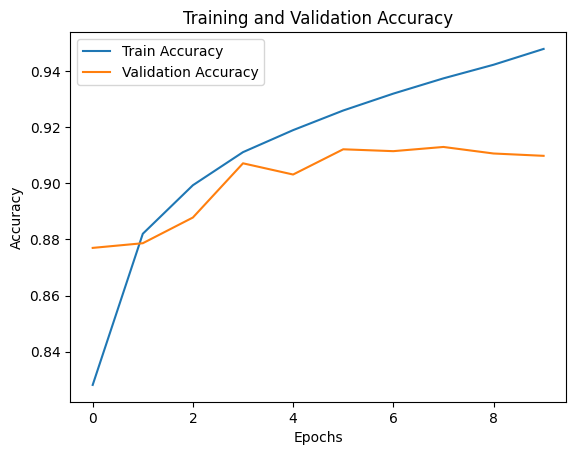

In [ ]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
predictions=model.predict(X_test)
predicted=np.argmax(predictions,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


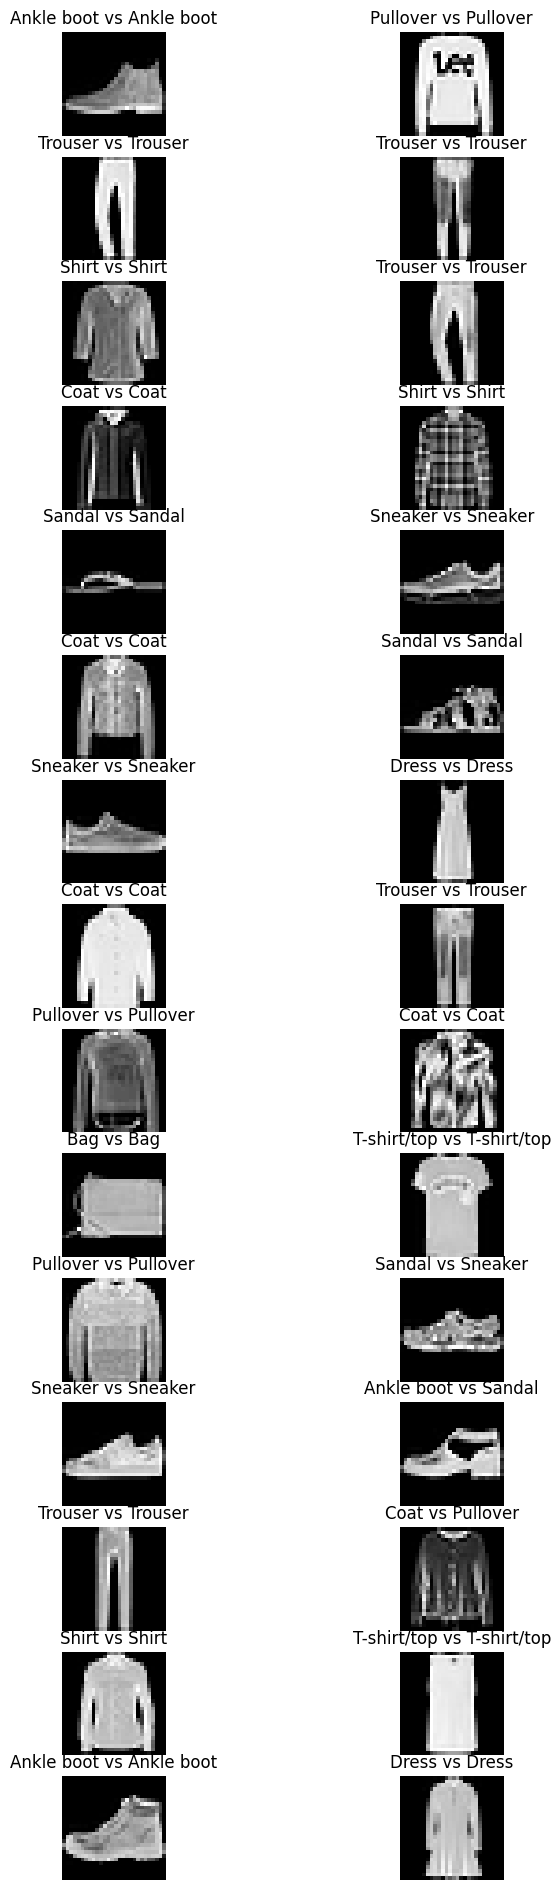

In [ ]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
i=5
plt.figure(figsize=(8,24))
for i in range(30):
  plt.subplot(15,2,i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap="gray")
  plt.title(f"{class_names[Y_test[i]]} vs {class_names[predicted[i]]}")
  plt.axis("off")
plt.show()